In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import linear_model

## Reading data from file

Inserting data from `Infosys.csv` file into the dataframe `stocks_df`

Then arranged the data obtained according to date in ascending order

In [2]:
stocks_df = pd.read_csv('Infosys.csv')

In [3]:
stocks_df

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,30-June-2023,1303.00,1338.85,1303.00,1335.20,1326.599553,1204517,54032,1.597912e+09,879824,73.04,35.85,32.20
1,28-June-2023,1287.05,1296.00,1281.40,1293.65,1290.677418,121067,6765,1.562584e+08,58445,48.27,14.60,6.60
2,27-June-2023,1275.05,1282.00,1274.55,1278.95,1278.866041,228817,13343,2.926263e+08,130380,56.98,7.45,3.90
3,26-June-2023,1268.05,1273.00,1262.30,1270.40,1270.228816,398560,19941,5.062624e+08,294114,73.79,10.70,2.35
4,23-June-2023,1276.00,1279.40,1263.60,1265.65,1270.790617,492481,35627,6.258402e+08,324439,65.88,15.80,-10.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,8-March-2023,1488.00,1494.75,1481.45,1492.50,1488.144261,162872,17536,2.423770e+08,105819,64.97,13.30,4.50
77,6-March-2023,1489.90,1520.00,1489.90,1507.55,1510.649755,412843,20515,6.236612e+08,256097,62.03,30.10,17.65
78,3-March-2023,1489.00,1489.00,1473.60,1479.80,1480.005962,99630,4883,1.474530e+08,60841,61.07,15.40,-9.20
79,2-March-2023,1489.95,1489.95,1467.90,1472.10,1474.463750,239355,23212,3.529203e+08,176480,73.73,22.05,-17.85


In [4]:
stocks_df['Date'] = pd.to_datetime(stocks_df.Date)

In [5]:
stocks_df.sort_values(by='Date', ascending = True, inplace = True)

In [6]:
stocks_df

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
80,2023-03-01,1492.00,1501.00,1481.75,1496.65,1494.452395,179213,9566,2.678253e+08,146896,81.97,19.25,4.65
79,2023-03-02,1489.95,1489.95,1467.90,1472.10,1474.463750,239355,23212,3.529203e+08,176480,73.73,22.05,-17.85
78,2023-03-03,1489.00,1489.00,1473.60,1479.80,1480.005962,99630,4883,1.474530e+08,60841,61.07,15.40,-9.20
77,2023-03-06,1489.90,1520.00,1489.90,1507.55,1510.649755,412843,20515,6.236612e+08,256097,62.03,30.10,17.65
76,2023-03-08,1488.00,1494.75,1481.45,1492.50,1488.144261,162872,17536,2.423770e+08,105819,64.97,13.30,4.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2023-06-23,1276.00,1279.40,1263.60,1265.65,1270.790617,492481,35627,6.258402e+08,324439,65.88,15.80,-10.35
3,2023-06-26,1268.05,1273.00,1262.30,1270.40,1270.228816,398560,19941,5.062624e+08,294114,73.79,10.70,2.35
2,2023-06-27,1275.05,1282.00,1274.55,1278.95,1278.866041,228817,13343,2.926263e+08,130380,56.98,7.45,3.90
1,2023-06-28,1287.05,1296.00,1281.40,1293.65,1290.677418,121067,6765,1.562584e+08,58445,48.27,14.60,6.60


## Obtaining and cleaning training data

Extracting necessary columns and rows from `stocks_df` into `training_df`

Converted date to type Datetime and set the date as index

Then replaced the missing dates with the values from their previous row

In [7]:
training_df = stocks_df.iloc[:60,:6]

In [8]:
training_df

,Date,Open Price,High Price,Low Price,Close Price,WAP
80,2023-03-01,1492.00,1501.00,1481.75,1496.65,1494.452395
79,2023-03-02,1489.95,1489.95,1467.90,1472.10,1474.463750
78,2023-03-03,1489.00,1489.00,1473.60,1479.80,1480.005962
77,2023-03-06,1489.90,1520.00,1489.90,1507.55,1510.649755
76,2023-03-08,1488.00,1494.75,1481.45,1492.50,1488.144261
75,2023-03-09,1495.20,1498.60,1475.00,1480.75,1485.618716
74,2023-03-10,1460.00,1474.50,1457.10,1471.35,1466.938890
73,2023-03-13,1462.00,1478.35,1428.00,1434.80,1447.123406
72,2023-03-14,1439.70,1448.40,1411.20,1421.05,1425.557497
71,2023-03-15,1435.10,1441.90,1416.90,1419.35,1424.523339


In [9]:
training_df = training_df.set_index('Date')

In [10]:
training_df

,Open Price,High Price,Low Price,Close Price,WAP
Date,,,,,
2023-03-01,1492.00,1501.00,1481.75,1496.65,1494.452395
2023-03-02,1489.95,1489.95,1467.90,1472.10,1474.463750
2023-03-03,1489.00,1489.00,1473.60,1479.80,1480.005962
2023-03-06,1489.90,1520.00,1489.90,1507.55,1510.649755
2023-03-08,1488.00,1494.75,1481.45,1492.50,1488.144261
2023-03-09,1495.20,1498.60,1475.00,1480.75,1485.618716
2023-03-10,1460.00,1474.50,1457.10,1471.35,1466.938890
2023-03-13,1462.00,1478.35,1428.00,1434.80,1447.123406
2023-03-14,1439.70,1448.40,1411.20,1421.05,1425.557497


In [11]:
new_date_range = pd.date_range(start="2023-03-1", end="2023-05-31", freq="D")
training_df = training_df.reindex(new_date_range, fill_value = np.nan)

In [12]:
training_df = training_df.fillna(method='bfill')

In [13]:
training_df

,Open Price,High Price,Low Price,Close Price,WAP
2023-03-01,1492.00,1501.00,1481.75,1496.65,1494.452395
2023-03-02,1489.95,1489.95,1467.90,1472.10,1474.463750
2023-03-03,1489.00,1489.00,1473.60,1479.80,1480.005962
2023-03-04,1489.90,1520.00,1489.90,1507.55,1510.649755
2023-03-05,1489.90,1520.00,1489.90,1507.55,1510.649755
...,...,...,...,...,...
2023-05-27,1332.10,1332.15,1310.50,1314.30,1315.289052
2023-05-28,1332.10,1332.15,1310.50,1314.30,1315.289052
2023-05-29,1332.10,1332.15,1310.50,1314.30,1315.289052
2023-05-30,1314.00,1326.05,1309.25,1322.90,1318.244080


## Obtaining testing data

Extracting necessary columns and rows from `stocks_df` into `testing_df`

Converted date to type Datetime and set the date as index

In [14]:
testing_df = stocks_df.iloc[60:,:6]

In [15]:
testing_df

,Date,Open Price,High Price,Low Price,Close Price,WAP
20,2023-06-01,1322.10,1329.50,1317.60,1319.45,1323.370419
19,2023-06-02,1311.15,1311.80,1296.10,1298.65,1303.536075
18,2023-06-05,1300.05,1309.50,1297.20,1304.95,1306.083858
17,2023-06-06,1290.00,1290.00,1273.15,1279.10,1279.094430
16,2023-06-07,1285.10,1293.60,1282.45,1289.00,1287.991423
15,2023-06-08,1284.00,1292.00,1281.10,1283.10,1287.479110
14,2023-06-09,1283.10,1283.10,1264.20,1266.00,1268.796920
13,2023-06-12,1271.10,1295.00,1271.10,1291.90,1288.056138
12,2023-06-13,1299.90,1306.20,1297.25,1305.35,1303.677444
11,2023-06-14,1306.00,1307.70,1293.05,1301.45,1298.302960


In [16]:
testing_df = testing_df.set_index('Date')

In [17]:
testing_df

,Open Price,High Price,Low Price,Close Price,WAP
Date,,,,,
2023-06-01,1322.10,1329.50,1317.60,1319.45,1323.370419
2023-06-02,1311.15,1311.80,1296.10,1298.65,1303.536075
2023-06-05,1300.05,1309.50,1297.20,1304.95,1306.083858
2023-06-06,1290.00,1290.00,1273.15,1279.10,1279.094430
2023-06-07,1285.10,1293.60,1282.45,1289.00,1287.991423
2023-06-08,1284.00,1292.00,1281.10,1283.10,1287.479110
2023-06-09,1283.10,1283.10,1264.20,1266.00,1268.796920
2023-06-12,1271.10,1295.00,1271.10,1291.90,1288.056138
2023-06-13,1299.90,1306.20,1297.25,1305.35,1303.677444


## Multivariate linear regression

Fed the training data to train the model

Obtained the coefficients and intercept of the linear model

Obtained predicted values for the `Close Price` and added it as a column to `testing_df`

In [18]:
# Linear regression

In [19]:
reg = linear_model.LinearRegression()
reg.fit(training_df[['Open Price', 'High Price', 'Low Price', 'WAP']], training_df['Close Price'])

LinearRegression()

In [20]:
reg.coef_

array([-0.4299221 ,  0.49656816,  0.51884782,  0.40799041])

In [21]:
reg.intercept_

9.458103419728559

In [22]:
input_data = testing_df[['Open Price', 'High Price', 'Low Price', 'WAP']]

In [23]:
reg.predict(input_data)

array([1324.80179952, 1301.47273951, 1306.71297188, 1277.86089176,
       1290.21032801, 1288.97926983, 1268.55606055, 1291.06191306,
       1304.18293372, 1297.93336254, 1287.15287137, 1292.10191024,
       1294.28645312, 1301.40459087, 1299.2656015 , 1279.82010688,
       1270.27330606, 1269.60943886, 1280.94888849, 1291.11481366,
       1331.39850142])

In [24]:
testing_df['Predicted Close Price'] = reg.predict(input_data)

In [25]:
testing_df

,Open Price,High Price,Low Price,Close Price,WAP,Predicted Close Price
Date,,,,,,
2023-06-01,1322.10,1329.50,1317.60,1319.45,1323.370419,1324.801800
2023-06-02,1311.15,1311.80,1296.10,1298.65,1303.536075,1301.472740
2023-06-05,1300.05,1309.50,1297.20,1304.95,1306.083858,1306.712972
2023-06-06,1290.00,1290.00,1273.15,1279.10,1279.094430,1277.860892
2023-06-07,1285.10,1293.60,1282.45,1289.00,1287.991423,1290.210328
2023-06-08,1284.00,1292.00,1281.10,1283.10,1287.479110,1288.979270
2023-06-09,1283.10,1283.10,1264.20,1266.00,1268.796920,1268.556061
2023-06-12,1271.10,1295.00,1271.10,1291.90,1288.056138,1291.061913
2023-06-13,1299.90,1306.20,1297.25,1305.35,1303.677444,1304.182934


## Plotting

Plotted the actual `Close Price` and `Predicted Close Price` in three chart formats:

 - `Line chart`
 - `Bar graph`
 - `Scatter Plot`

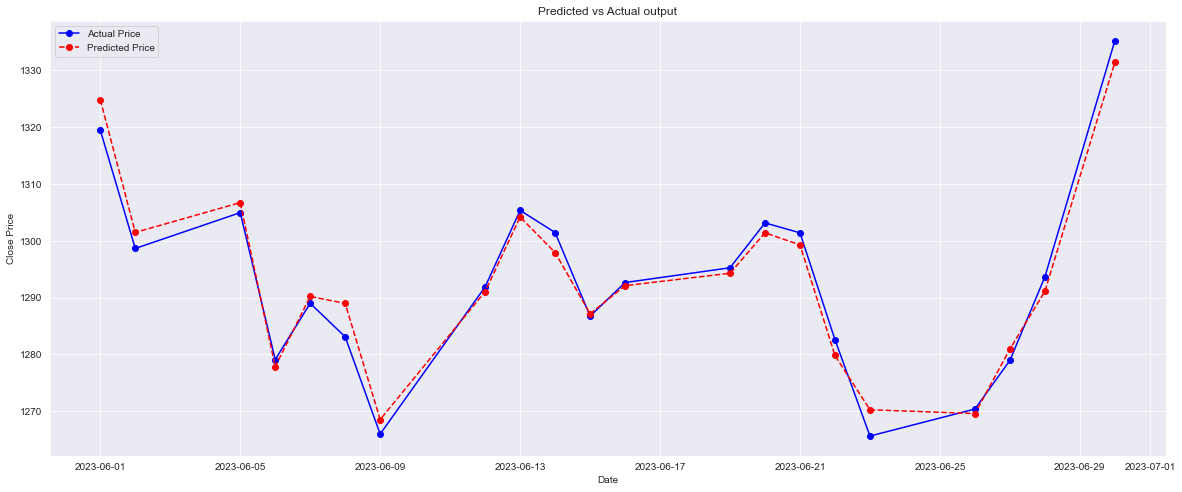

In [26]:
# Line chart
sns.set_style("darkgrid")

plt.figure(figsize=(20, 8))
plt.plot(testing_df['Close Price'], 'o-b')
plt.plot(testing_df['Predicted Close Price'], 'o--r')

plt.xlabel('Date')
plt.ylabel('Close Price')

plt.title("Predicted vs Actual output")
plt.legend(['Actual Price', 'Predicted Price']);

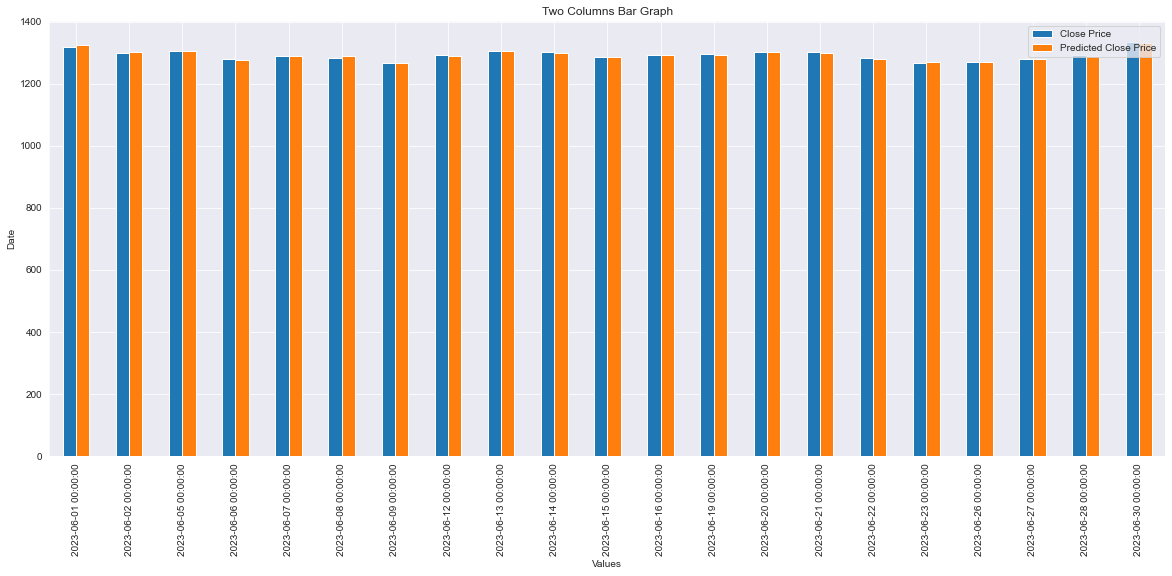

In [27]:
fig, ax = plt.subplots(figsize=(20, 8))

testing_df[['Close Price', 'Predicted Close Price']].plot(kind='bar', ax=ax)
plt.ylabel('Date')
plt.xlabel('Values')
plt.title('Two Columns Bar Graph')
plt.show()

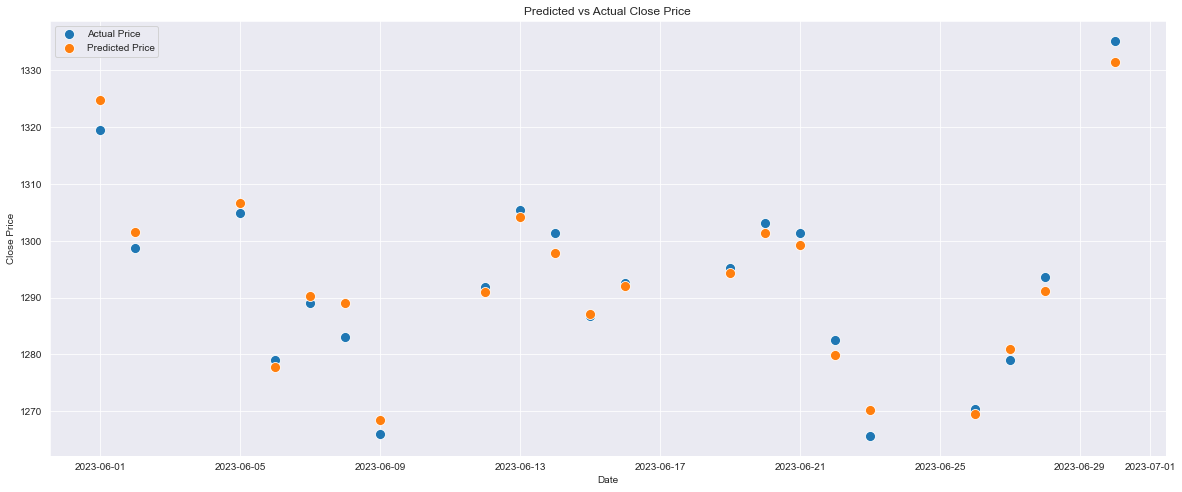

In [28]:
plt.figure(figsize=(20, 8))
plt.title('Predicted vs Actual Close Price')

sns.scatterplot(testing_df['Close Price'], s = 100)
sns.scatterplot(testing_df['Predicted Close Price'], s = 100)

plt.legend(['Actual Price', 'Predicted Price']);